In [196]:
#DATASET DE ENTRADA
pastaTrab = 'D:\\TCC\Meu TCC\\Dados\\3 - Dados Tratados'

In [197]:
import pandas as pd
import numpy as np
import statsmodels as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')
pd.set_option('max_rows', None)

In [198]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

In [199]:
df_base_line=pd.read_csv(pastaTrab + '\\07_dadosNormal.csv', index_col=[0,1])

In [200]:
#Definindo base das variáveis independentes e da dependente
y_data = df_base_line['Tax_%_GDP']
x_data = df_base_line.drop(columns = ['Tax_%_GDP'], axis = 1)

In [202]:
# Definindo os dataframes de treinamento e teste:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(x_data, 
                                                                  y_data, 
                                                                  test_size = 0.2, 
                                                                  random_state = 123)

# Regressão Linear

In [203]:
# Instancia o objeto
regressao_linear = LinearRegression()
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
regressao_linear.fit(X_treinamento, y_treinamento)

LinearRegression()

In [204]:
r2_train = regressao_linear.score(X_treinamento, y_treinamento)
r2_test = regressao_linear.score(X_teste, y_teste)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.60
R2 no set de teste: 0.59


In [205]:
from sklearn import metrics
y_pred = regressao_linear.predict(X_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))

MAE: 0.12738133149165062
MSE: 0.02658883969833795


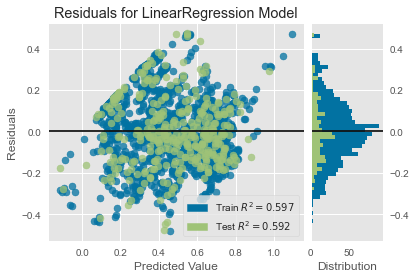

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [206]:
#plot the difference between the expected and actual values
visualizer = ResidualsPlot(regressao_linear)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

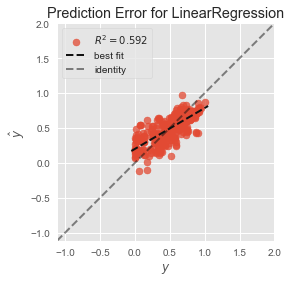

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [207]:
visualizer = PredictionError(regressao_linear)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Regressão Ridge

In [208]:
# Instancia o objeto
rr = Ridge(random_state = 123)
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
rr.fit(X_treinamento, y_treinamento)

Ridge(random_state=123)

In [209]:
r2_train = rr.score(X_treinamento, y_treinamento)
r2_test = rr.score(X_teste, y_teste)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.60
R2 no set de teste: 0.59


In [210]:
y_pred = rr.predict(X_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred))

MAE: 0.1277242053680517
MSE: 0.026724553791013704


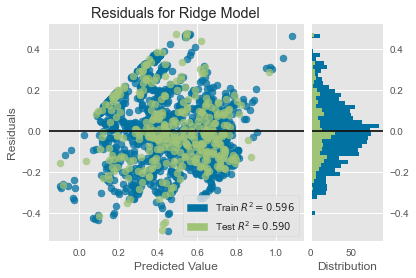

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [211]:
#plot the difference between the expected and actual values
visualizer = ResidualsPlot(rr)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

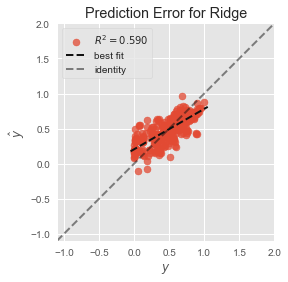

<AxesSubplot:title={'center':'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [212]:
visualizer = PredictionError(rr)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Regressor da árvore de decisão

In [213]:
#Instância o objeto
dtr = DecisionTreeRegressor(min_samples_leaf=30, random_state = 123)
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
dtr.fit(X_treinamento, y_treinamento)

DecisionTreeRegressor(min_samples_leaf=30, random_state=123)

In [214]:
r2_train = dtr.score(X_treinamento, y_treinamento)
r2_test = dtr.score(X_teste, y_teste)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.82
R2 no set de teste: 0.77


In [215]:
y_pred_dtr = dtr.predict(X_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_dtr))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_dtr))

MAE: 0.08774224568896621
MSE: 0.015037574172094578


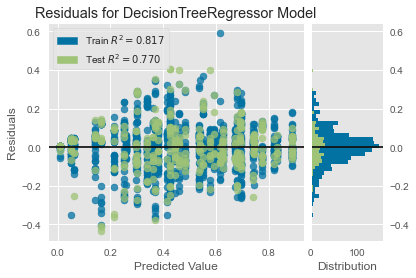

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [216]:
#plot the difference between the expected and actual values
visualizer = ResidualsPlot(dtr)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

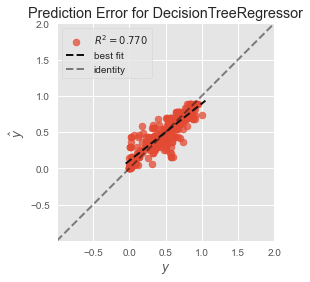

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [217]:
visualizer = PredictionError(dtr)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [218]:
# import export_graphviz
from sklearn.tree import export_graphviz
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dtr, feature_names= ['GINI_Index', 'Interest_expense_%_GDP',
                                  'OilRrents_%_GDP', 'Agriculture_%_GDP', 'RuleofLaw','Political_StabilityNoViolence',
                                  'VoiceandAccountability'],
                out_file = pastaTrab +'\\tree5.dot')


# Regressor florestas aleatórias

In [219]:
#Instância o objeto
rfr = RandomForestRegressor(min_samples_leaf=30, random_state=123)
# Treina o modelo usando as amostras/dataset de treinamento: X_treinamento e y_treinamento 
rfr.fit(X_treinamento, y_treinamento)

RandomForestRegressor(min_samples_leaf=30, random_state=123)

In [220]:
r2_train = rfr.score(X_treinamento, y_treinamento)
r2_test = rfr.score(X_teste, y_teste)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.81
R2 no set de teste: 0.77


In [221]:
y_pred_rfr = rfr.predict(X_teste)
print('MAE:', metrics.mean_absolute_error(y_teste, y_pred_rfr))
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_rfr))

MAE: 0.09289254022608061
MSE: 0.014872988641761275


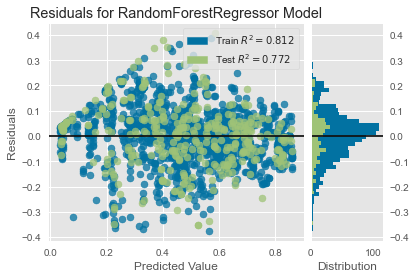

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [222]:
#plot the difference between the expected and actual values
visualizer = ResidualsPlot(rfr)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

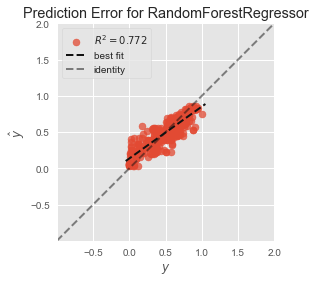

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [223]:
visualizer = PredictionError(rfr)

visualizer.fit(X_treinamento, y_treinamento)  # Fit the training data to the visualizer
visualizer.score(X_teste, y_teste)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

#  Ajustes de hiperparâmetros e validação cruzada

In [259]:
# Dicionário com hiperparâmetros para o ajuste do modelo de árvore de decisão:
hiperparametros_dtr = {"criterion": ["mae", "mse", "poisson"],     
                   "min_samples_split": [30, 40, 60, 80], 
                   "max_depth": [6, 7, 8, 10, 15], 
                   "min_samples_leaf": [15, 20, 25, 30], 
                   "max_leaf_nodes": [None, 2, 3]}

In [260]:
# Grid search dos hiperparâmetros, utlizando 10 conjuntos para avaliação cruzada 
dtr_CV = GridSearchCV(dtr, param_grid= hiperparametros_dtr, cv = 10, n_jobs= -1)
dtr_CV.fit(X_treinamento, y_treinamento)

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(min_samples_leaf=30,
                                             random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['mae', 'mse', 'poisson'],
                         'max_depth': [6, 7, 8, 10, 15],
                         'max_leaf_nodes': [None, 2, 3],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'min_samples_split': [30, 40, 60, 80]})

In [261]:
# Identificação dos melhores hiperparâmetros
dtr_CV.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'max_leaf_nodes': None,
 'min_samples_leaf': 15,
 'min_samples_split': 30}

In [262]:
#Criação do modelo com os melhores hiperparâmetros
dtr_opt = DecisionTreeRegressor(criterion= 'mse', max_depth= 15, max_leaf_nodes= None, min_samples_leaf = 15,
                                  min_samples_split= 30)

In [269]:
#Avaliação do modelo
dtr_opt.fit(X_treinamento, y_treinamento)
y_pred_dtr_CV = dtr_opt.predict(X_teste)
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_dtr_CV))
print('R2 :', metrics.r2_score(y_teste, y_pred_dtr_CV))

MSE: 0.010590269136677077
R2 : 0.8376727463545722


In [264]:
# Dicionário com hiperparâmetros para o ajuste do modelo de florestas aleatórias:
hiperparametros_rfr= {"bootstrap": [True, False], 
                      "max_depth": [6, 7, 8, 10, 15], 
                      "min_samples_leaf": [15, 20, 25, 30], 
                      "max_leaf_nodes": [None, 2, 3],
                      "min_samples_split": [30, 40, 60, 80],
                      "n_estimators": [10, 15, 20, 25]}

In [265]:
# Grid search dos hiperparâmetros, utlizando 10 conjuntos para avaliação cruzada 
rfr_CV = GridSearchCV(rfr, param_grid= hiperparametros_rfr, cv = 10, n_jobs= -1)
rfr_CV.fit(X_treinamento, y_treinamento)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(min_samples_leaf=30,
                                             random_state=123),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [6, 7, 8, 10, 15],
                         'max_leaf_nodes': [None, 2, 3],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'min_samples_split': [30, 40, 60, 80],
                         'n_estimators': [10, 15, 20, 25]})

In [266]:
# Identificação dos melhores hiperparâmetros
rfr_CV.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_leaf_nodes': None,
 'min_samples_leaf': 15,
 'min_samples_split': 30,
 'n_estimators': 25}

In [267]:
#Criação do modelo com os melhores hiperparâmetros
rfr_opt = RandomForestRegressor( bootstrap= True, max_depth= 15, max_leaf_nodes= None, min_samples_leaf = 15,
                                 min_samples_split= 30, n_estimators = 25)

In [270]:
#Avaliação do modelo
rfr_opt.fit(X_treinamento, y_treinamento)
y_pred_rfr_CV = rfr_opt.predict(X_teste)
print('MSE:', metrics.mean_squared_error(y_teste, y_pred_rfr_CV))
print('R2 :', metrics.r2_score(y_teste, y_pred_rfr_CV))

MSE: 0.009883683764883175
R2 : 0.8485032608003389


In [271]:
l_colunas = ['GINI_Index', 'Interest_expense_%_GDP','OilRrents_%_GDP', 'Agriculture_%_GDP', 'RuleofLaw',
             'Political_StabilityNoViolence', 'VoiceandAccountability']

In [274]:
#Ajuste do modelo otimizado ao conjunto de treinamento para verificar sobreajuste
y_pred_rfr_CVt = rfr_opt.predict(X_treinamento)
print('R2 :', metrics.r2_score(y_treinamento, y_pred_rfr_CVt))

R2 : 0.8872743983272741


In [272]:
# Importância das Variáveis
df_importancia_variaveis = pd.DataFrame(zip(l_colunas, rfr_opt.feature_importances_), columns= ['coluna', 'importancia'])
df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
print(df_importancia_variaveis)

                          coluna  importancia
1         Interest_expense_%_GDP     0.388162
6         VoiceandAccountability     0.200940
0                     GINI_Index     0.176173
3              Agriculture_%_GDP     0.087851
5  Political_StabilityNoViolence     0.069870
2                OilRrents_%_GDP     0.040190
4                      RuleofLaw     0.036813
